### 3.1.1 Example of age structure

Consider a population where individuals live, at most, for ﬁve years and become mature at age 3. Skipping the usual process of deriving dynamic equations,instead we start with recursive equations to represent the dynamics of this population with a series of ﬁve equations:

    N1 , t+1 = F3*N3,t + F4*N4,t + F5*N5,t

    N2 , t+1 = S1 * N1,t

    N3 , t+1 = S2 * N2,t

    N4 , t+1 = S3 * N3,t

    N5 , t+1 = S4 * N4,t

Where Na,t is the number of individuals of age a at time t,Fa
is the number of offspring produced per individual aged a, and Sa
is the proportion of individuals that survive from age a to age a+1. 
The things that we might want to know about this population include the following:
1. Will the population size increase or decrease over time?
2. What is the relative abundance of each age (what is the distribution of ages in the population)?
3. Which life stages have the greatest reproductive value, and which model parameters contribute most to the population growth rate?

#### 3.1.1 Age Structure Example : Annual Rodent Population on an Island
A small, isolated island in the Pacific is home to a population of Island Voles — a fictional species of rodent studied by ecologists to understand population dynamics and conservation risks.

| Trait            | Description                                                                                   |
| ---------------- | --------------------------------------------------------------------------------------------- |
| **Lifespan**     | 5 years (most don’t live longer)                                                              |
| **Age Classes**  | 0 (newborn), 1 (juvenile), 2 (sub-adult), 3–4 (reproductive adults)                           |
| **Maturity Age** | Becomes sexually mature at **3 years**                                                        |
| **Reproduction** | Females aged 3 and 4 give birth once per year during the wet season                           |
| **Offspring**    | Age-3 females produce **1.2 young** on average per year; age-4 females slightly less: **0.8** |
| **Survival**     | Lower for young, improves as they age, then drops after 4 years                               |
| **Constraints**  | No predators, limited resources, closed population (no migration)                             |

Island ecologists want to:
 * Monitor the population trajectory over 50 years
 * Understand if the population stabilizes, grows, or crashes
 * Use this to inform potential reintroduction to the mainland, where predators exist

Mapping the Model:
 * Age Classes (0–4) match the vole's yearly age brackets
 * Fertility:
    * Age 3 → 1.2 offspring/year
    * Age 4 → 0.8 offspring/year
 * Survival rates:
    * From age 0 to 1 → 50% survive
    * Age 1 to 2 → 60%
    * Age 2 to 3 → 70%
    * Age 3 to 4 → 60%

Matrix: 
| Age →               | 0 (Newborn) | 1 (Juvenile) | 2 (Sub-adult) | 3 (Adult) | 4 (Older Adult) |
| ------------------- | ----------- | ------------ | ------------- | --------- | --------------- |
| **0 (Newborn)**     | 0.0         | 0.0          | 0.0           | 1.2       | 0.8             |
| **1 (Juvenile)**    | 0.5         | 0.0          | 0.0           | 0.0       | 0.0             |
| **2 (Sub-adult)**   | 0.0         | 0.6          | 0.0           | 0.0       | 0.0             |
| **3 (Adult)**       | 0.0         | 0.0          | 0.7           | 0.0       | 0.0             |
| **4 (Older Adult)** | 0.0         | 0.0          | 0.0           | 0.6       | 0.0             |


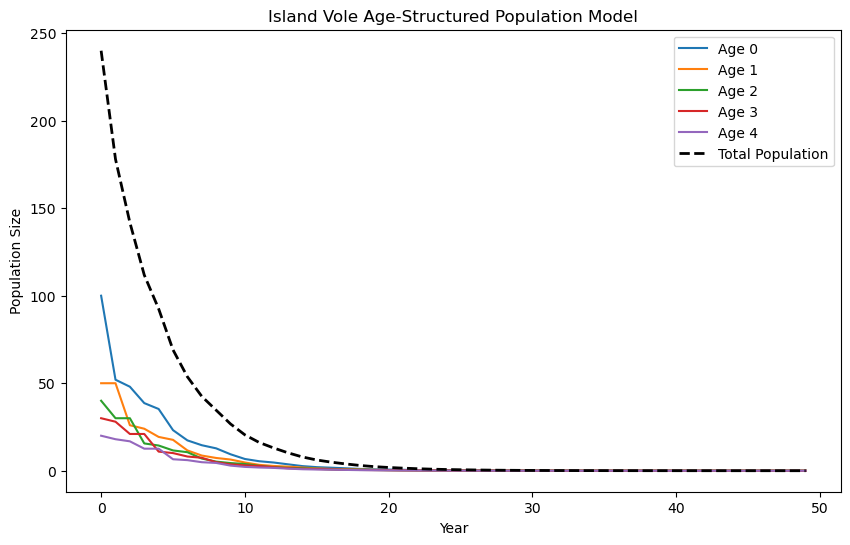

Final population vector after 50 years:
[0. 0. 0. 0. 0.]

Total population: 0.0

Stable age distribution (proportions):
[0.344 0.221 0.17  0.15  0.114]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Leslie matrix (5x5)
L = np.array([
    [0,   0,   0, 1.2, 0.8],
    [0.5, 0,   0, 0,   0],
    [0,   0.6, 0, 0,   0],
    [0,   0,   0.7, 0, 0],
    [0,   0,   0, 0.6, 0]
])

# Initial population vector (ages 0–4)
P0 = np.array([100, 50, 40, 30, 20])

# Number of years to simulate
years = 50

# Store population over time
populations = np.zeros((years, len(P0)))
populations[0] = P0

# Project the population forward
for t in range(1, years):
    populations[t] = L @ populations[t-1]

# Calculate total population each year
total_population = populations.sum(axis=1)

# Plot total and age-specific population trajectories
plt.figure(figsize=(10, 6))
for i in range(populations.shape[1]):
    plt.plot(populations[:, i], label=f"Age {i}")
plt.plot(total_population, 'k--', linewidth=2, label='Total Population')
plt.title("Island Vole Age-Structured Population Model")
plt.xlabel("Year")
plt.ylabel("Population Size")
plt.legend()
plt.show()

# Display stable age distribution and final results
print("Final population vector after 50 years:")
print(populations[-1].round(2))
print("\nTotal population:", round(total_population[-1], 2))

# Stable age distribution (normalized last vector)
stable_age_dist = populations[-1] / populations[-1].sum()
print("\nStable age distribution (proportions):")
print(np.round(stable_age_dist, 3))


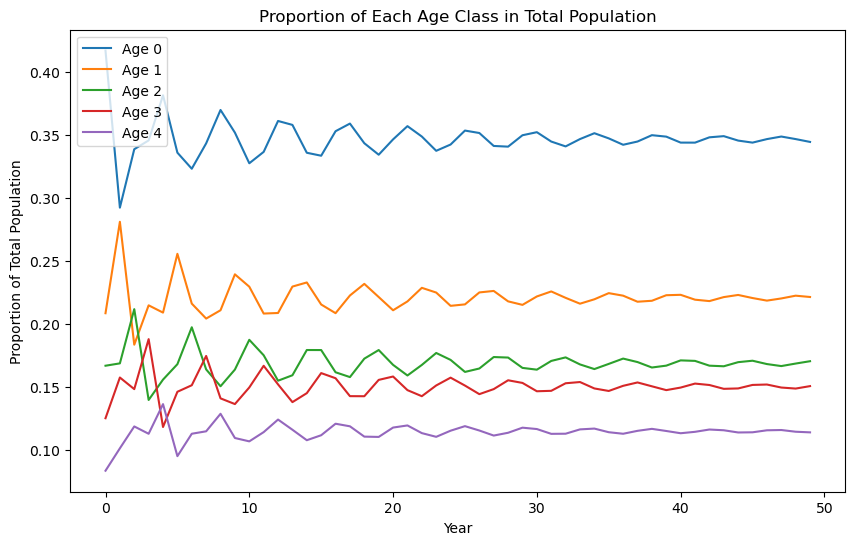

Final population vector after 50 years:
[0. 0. 0. 0. 0.]

Total population: 0.0

Stable age distribution (proportions):
[0.344 0.221 0.17  0.15  0.114]


In [2]:
# ===== PLOT 2: Proportion of total population =====
proportions = populations / total_population[:, None]  # normalize each year

plt.figure(figsize=(10,6))
for i in range(proportions.shape[1]):
    plt.plot(proportions[:, i], label=f"Age {i}")
plt.title("Proportion of Each Age Class in Total Population")
plt.xlabel("Year")
plt.ylabel("Proportion of Total Population")
plt.legend()
plt.show()

# ===== Print final results =====
print("Final population vector after 50 years:")
print(populations[-1].round(2))
print("\nTotal population:", round(total_population[-1], 2))

# Stable age distribution (proportions at final year)
stable_age_dist = populations[-1] / populations[-1].sum()
print("\nStable age distribution (proportions):")
print(np.round(stable_age_dist, 3))

### Discussion
 * What was the real world example?
    * A small, isolated population of Island Voles (fictional rodent species) living on a Pacific Island
    * The rodents have a lifespan of 5 years, are mature and able to reproduce during ages 3 and 4, juveniles have a low survival, middle ages have a higher survival, and older adults have a lower survival rate. It is a closed population with no immigration or emigration. 
 * What was the result of the 50 year model using your initial populations?
    * The inital population followed this vector : P0 = [100, 50, 40, 30, 20]
    * The vole population went extinct before year 50
 * Describe what the transient and stable behavior of the model looked like.
    * The transient phase was between 0-10 years in which some reproduction occurs, but fewer juveniles survive to replace them so the total births drop each generation.
    * the stable phase was after 10 years, the structure stabilized but the total number of individuals kept shrinking each year because the deaths exceed the births. 

### 3.1.2 Example of stage structure

If the population is stage structured, we must account for individuals remaining in a stage for multiple time steps. We’ll use the same notation as before, N
i,t, but now i refers to stage, not age. So i = o will mean offspring, i = j will be juveniles that are not mature, and i = a will be mature adults. We will dispense with the notation Si for now because we are interested in not only how many individuals survive but also which stage the survivors are in. We use the notation Gi to denote the fraction of individuals in stage i that survive and move onto the next stage, and Pi to denote the fraction of individuals that survive and remain in the same stage. For our hypothetical model, we’ll assume that all surviving offspring transition into the juvenile stage,but individuals can survive and remain in the juvenile stage,and adults survive and remain in the adult stage. Our model then becomes

    No , t+1 = F * Na,t
    Nj , t+1 = Go * No,t + Pj * Nj,t
    Na , t+1 = Gj * Nj,t + Pa * Na,t

In words, this says that the number of juveniles next year equals the number of
offspring from last year that survived, plus the number of juveniles from last year that survived and remained in the juvenile stage. The number of adults next year equals the number of juveniles from last year that transitioned to become adults, plus the number of adults from last year that survived.